# Importing the Libraries

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns


# Reading the Data

In [18]:
df=pd.read_csv('Iris.csv')

# Exploratory Data Analysis

In [19]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
df.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [21]:
df.Species=df.Species.map({'Iris-setosa':1,'Iris-virginica':2,'Iris-versicolor':3})

In [22]:
df=df.drop('Id',axis=1)

In [23]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [24]:
df.skew().sort_values()

PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
Species          0.000000
SepalLengthCm    0.314911
SepalWidthCm     0.334053
dtype: float64

In [25]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.460039
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.612165
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.649101
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.580749
Species,0.460039,-0.612165,0.649101,0.580749,1.000000


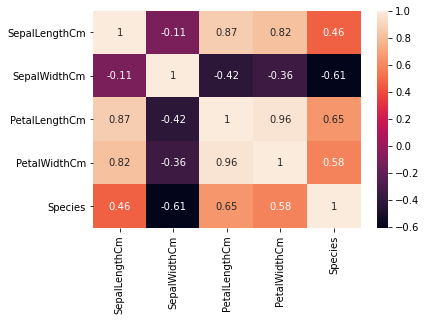

In [26]:
sns.heatmap(df.corr(),annot=True)

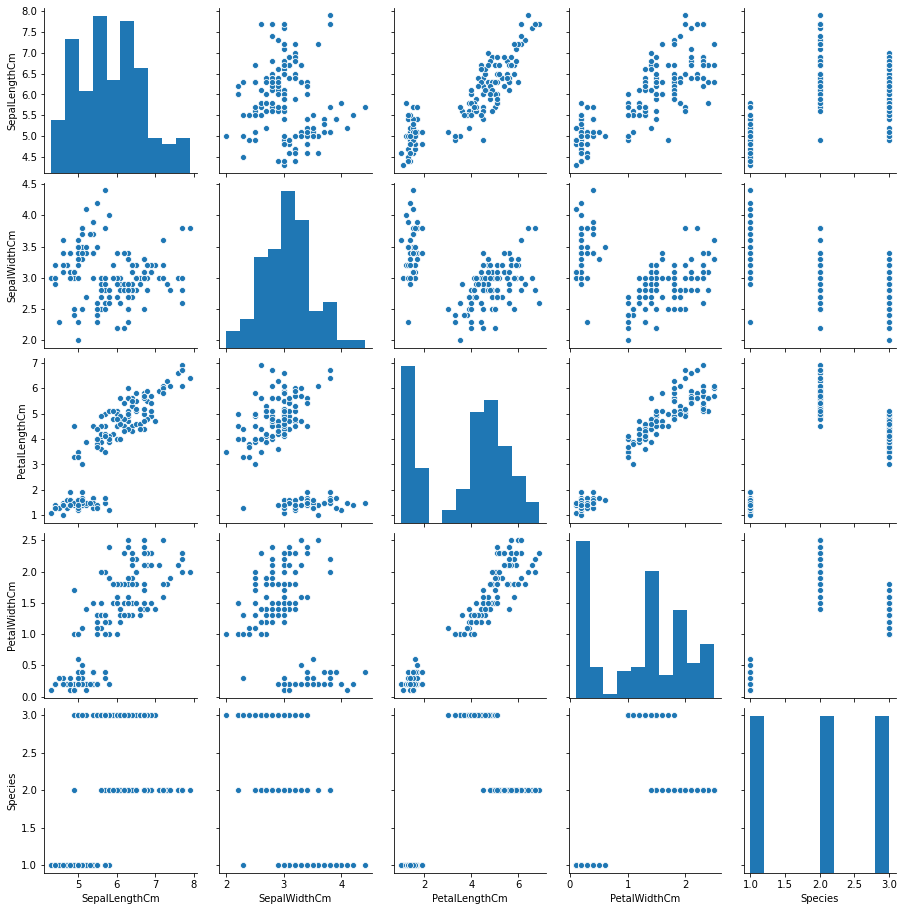

In [27]:
sns.pairplot(df)

In [37]:
target=df.Species
df=df.drop('Species',axis=1)

# Training the Model

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


In [55]:
X_train,X_test,Y_train,Y_test=train_test_split(df,target,test_size=0.2)

In [56]:
steps=[('scaler',StandardScaler()),('lr',LogisticRegression())]

In [57]:
pipeline=Pipeline(steps)

In [61]:
parameter={'lr__C':np.logspace(0,4,20),'lr__max_iter':[20000]}

In [62]:
cv=GridSearchCV(pipeline,parameter,cv=3)

In [63]:
cv.fit(X_train,Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('lr',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
              

In [64]:
cv_pred=cv.predict(X_test)

# Predictions

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
accuracy_score(Y_test,cv_pred)

0.9666666666666667

In [68]:
from sklearn.metrics import classification_report

In [70]:
print(classification_report(Y_test,cv_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.86      0.92         7
           3       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



In [71]:
print('Best score: ', cv.best_score_)


Best score:  0.9583333333333334
